# Import Library and packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Import white wine data set from url

In [3]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# understand the features , missing values,type of characters,percentile, mean, std, Quartiles, min, max

In [4]:
data.head()
data.tail()
data.info()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Correlation matrix, Heat map

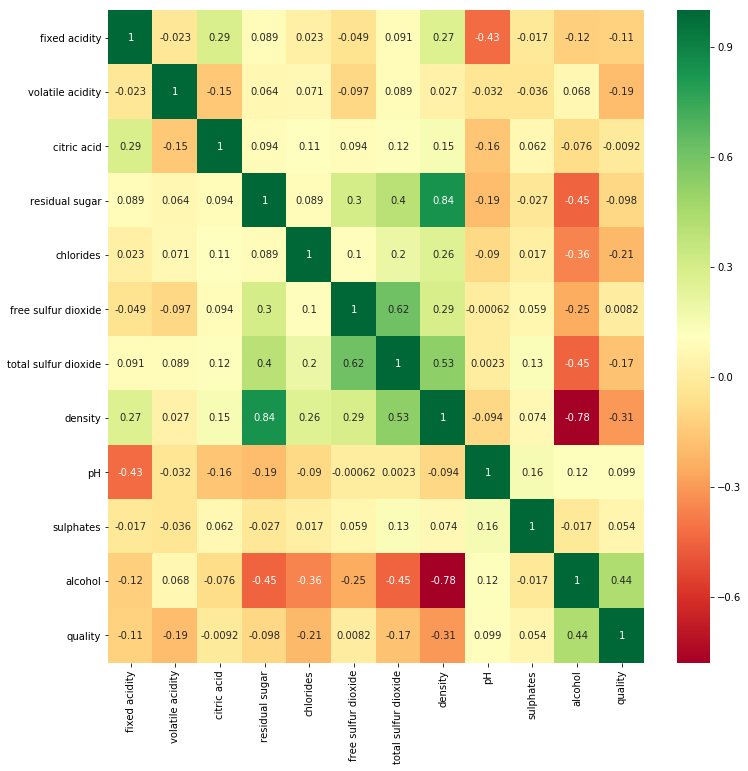

In [5]:
x=data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

# Segergating X(without quality) and Y (quality)

In [6]:
y=data.quality
x=data.drop('quality',axis=1)
y.head()
x.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# Exploratory data analytics

In [7]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("whitewine_EDA_report.html")

# split the data to train and test - 70% and 30%

In [8]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

 # standard scaler function - The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. This will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1

In [9]:
from sklearn. preprocessing import StandardScaler 
sc=StandardScaler()
arr_scld= sc.fit_transform(train_x)
train_xsc=pd.DataFrame(arr_scld,columns=train_x.columns)
sc
arr_scld
train_xsc

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[-1.02197492, -0.47290295,  0.04594479, ...,  1.15256496,
        -1.06766508,  1.81506047],
       [ 2.33376259, -0.86537634, -0.28149545, ..., -1.62400482,
        -0.18793143,  0.58396236],
       [-0.18304055, -0.47290295, -0.03591527, ..., -0.50015514,
         0.25193539, -0.31884292],
       ...,
       [ 1.85437152, -0.86537634,  0.70082528, ..., -0.83069917,
         1.39558913,  0.50188915],
       [-0.90212716, -0.5710213 , -0.69079575, ...,  0.1609329 ,
        -0.80374498,  0.17359633],
       [ 0.4161983 , -0.47290295,  0.37338504, ..., -0.63237275,
        -0.45185152, -1.2216482 ]])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.021975,-0.472903,0.045945,-1.003121,-0.981663,-0.718522,-0.642333,-1.479321,1.152565,-1.067665,1.815060
1,2.333763,-0.865376,-0.281495,-0.274260,-0.839267,-0.081570,-0.431802,-0.542720,-1.624005,-0.187931,0.583962
2,-0.183041,-0.472903,-0.035915,0.336408,0.110037,0.555382,0.878166,0.223893,-0.500155,0.251935,-0.318843
3,0.296351,1.391346,-1.100096,-0.707637,-0.364615,-0.428998,-0.689117,-1.455989,0.293151,-0.187931,2.389573
4,0.536046,-0.767258,0.455245,-0.806131,0.110037,-0.660617,-1.203748,-1.202673,-1.624005,-1.243612,1.240548
5,-0.542584,0.213925,-0.035915,-0.234862,0.204967,-0.313189,-0.034133,-0.336068,0.491477,0.779776,0.501889
6,0.416198,-0.472903,-0.117775,0.415204,0.584689,0.671191,1.112089,0.517205,0.028715,-0.803745,-0.482989
7,-0.302888,-0.571021,-0.854516,2.148711,0.062572,0.092144,-0.478587,1.670457,-0.698482,-0.275905,-1.385795
8,2.213915,0.213925,2.092446,-0.924325,0.015106,-1.471283,-1.601417,-0.106084,-0.830699,0.603829,0.255670
9,0.176503,-0.080430,0.209665,2.818476,-0.032359,0.555382,0.737813,2.317079,-1.227352,-0.363878,-1.385795


# Random seed function to 

In [10]:
import random
random.seed(1234)

# Creation of Linear regression model

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predict_test=lm.predict(test_x)
print(lm.coef_)
data_m=pd.DataFrame({'test_x':x.columns,'coeff':lm.coef_})
data_m=data_m.sort_values(by=['coeff'])
data_m

[ 5.05720124e-02 -1.99701100e+00  2.86986515e-03  7.87685381e-02
 -5.26695620e-01  2.88140351e-03  4.27771478e-05 -1.34394915e+02
  6.26499100e-01  5.76517695e-01  2.20279529e-01]


,test_x,coeff
7,density,-134.394915
1,volatile acidity,-1.997011
4,chlorides,-0.526696
6,total sulfur dioxide,0.000043
2,citric acid,0.002870
5,free sulfur dioxide,0.002881
0,fixed acidity,0.050572
3,residual sugar,0.078769
10,alcohol,0.220280
9,sulphates,0.576518


# plot bar chart for the coefficients 

<function matplotlib.pyplot.show(*args, **kw)>

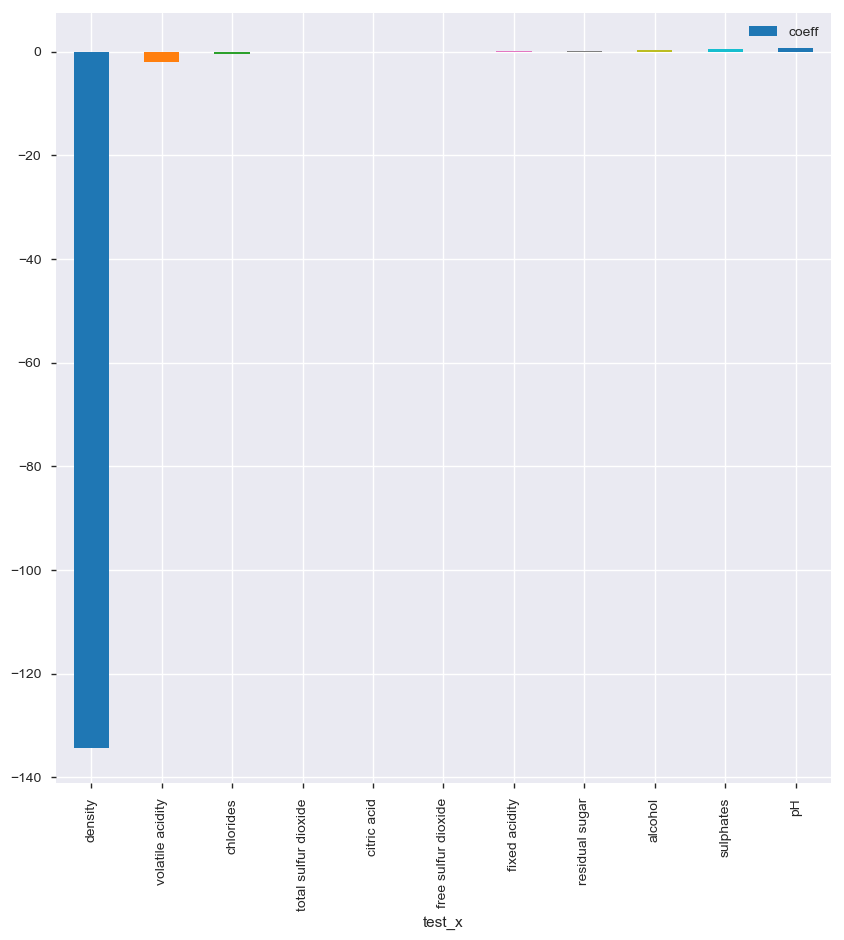

In [13]:
data_m.plot(x='test_x',y='coeff',kind='bar',figsize=(10,10))
plt.show

In [14]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Print Linear regression results for Test data is 27.6%

In [15]:
print("R square value for regression test data is")
np.round(lm.score(test_x,test_y)*100,2)

R square value for regression test data is


27.6

# Print Linear regression results for Train data is 28.3%

In [16]:
print("R square value for regression train data is")
np.round(lm.score(train_x,train_y)*100,2)

R square value for regression train data is


28.29

In [17]:
predict_test_lm=lm.predict(test_x)

# Calculation of Mean squared error  is 0.54

In [18]:
from sklearn import metrics
print("simple linear regression Mean square error(MSE) for test data is: ")
np.round(metrics.mean_squared_error(test_y,predict_test_lm),2)

simple linear regression Mean square error(MSE) for test data is: 


0.54

# Calculation of Mean absolute error  is 0.58

In [19]:
from sklearn.metrics import mean_absolute_error
print("simple linear regression absolute error(mae) for Test data is:")
np.round(metrics.mean_absolute_error(test_y,predict_test_lm),2)

simple linear regression absolute error(mae) for Test data is:


0.58

# Calculation of Prediction Error , comparsion of Min and Max error

In [20]:
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['quality']-fdf['Predicted']
fdf
fdf['Prediction_Error'].max()
fdf['Prediction_Error'].min()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predicted,Prediction_Error
2414,6.2,0.380,0.18,7.40,0.095,28.0,195.0,0.99773,3.53,0.71,9.20,4,5.2,-1.2
1584,6.4,0.250,0.74,7.80,0.045,52.0,209.0,0.99560,3.21,0.42,9.20,6,5.5,0.5
3248,6.4,0.250,0.37,4.50,0.039,41.0,147.0,0.99210,3.18,0.40,11.10,7,6.1,0.9
645,6.3,0.260,0.25,7.80,0.058,44.0,166.0,0.99610,3.24,0.41,9.00,5,5.4,-0.4
3163,7.1,0.360,0.37,4.80,0.019,39.0,114.0,0.99036,3.08,0.49,12.70,7,6.5,0.5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.40,6,5.3,0.7
600,6.7,0.300,0.35,1.40,0.180,36.0,160.0,0.99370,3.11,0.54,9.40,6,5.1,0.9
1379,6.9,0.460,0.20,0.90,0.054,5.0,126.0,0.99200,3.10,0.42,10.40,6,5.1,0.9
1554,7.9,0.420,0.49,8.20,0.056,32.0,164.0,0.99650,3.29,0.60,11.20,7,5.7,1.3
643,6.4,0.240,0.28,11.50,0.050,34.0,163.0,0.99690,3.31,0.45,9.50,5,5.8,-0.8


2.5

-3.2